In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("carmenbravo/plantasm")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/carmenbravo/plantasm/versions/1


In [15]:
import os

# Caminho para a imagem inválida
invalid_image_path = '/root/.cache/kagglehub/datasets/carmenbravo/plantasm/versions/1/Plantas_Medicinales/canelon/14.jpg'

# Verificar se o arquivo existe e removê-lo
if os.path.exists(invalid_image_path):
    os.remove(invalid_image_path)
    print(f"Imagem {invalid_image_path} removida com sucesso.")
else:
    print(f"Imagem {invalid_image_path} não encontrada.")

Imagem /root/.cache/kagglehub/datasets/carmenbravo/plantasm/versions/1/Plantas_Medicinales/canelon/14.jpg não encontrada.


In [16]:
from PIL import Image
import os

# Caminho para o dataset
data_dir = '/root/.cache/kagglehub/datasets/carmenbravo/plantasm/versions/1'

# Função para verificar imagens
def check_images(directory):
    invalid_images = []
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(subdir, file)
            try:
                with Image.open(filepath) as img:
                    img.verify()  # Verifica se a imagem é válida
            except Exception as e:
                print(f"Erro ao abrir {filepath}: {e}")
                invalid_images.append(filepath)
    return invalid_images

invalid_images = check_images(data_dir)
print(f"Imagens inválidas encontradas: {len(invalid_images)}")
for img in invalid_images:
    print(img)

Imagens inválidas encontradas: 0


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuração do gerador de dados
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% dos dados para validação
)

# Carregar as imagens
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

print(f"Total de imagens de treinamento: {train_generator.samples}")
print(f"Total de imagens de validação: {validation_generator.samples}")

Found 532 images belonging to 1 classes.
Found 132 images belonging to 1 classes.
Total de imagens de treinamento: 532
Total de imagens de validação: 132


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Verifique o número de classes
num_classes = len(train_generator.class_indices)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')  # Ajuste para o número correto de classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 117s 7s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 135s 8s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 954ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 141s 9s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 904ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 154s 7s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 908ms/step

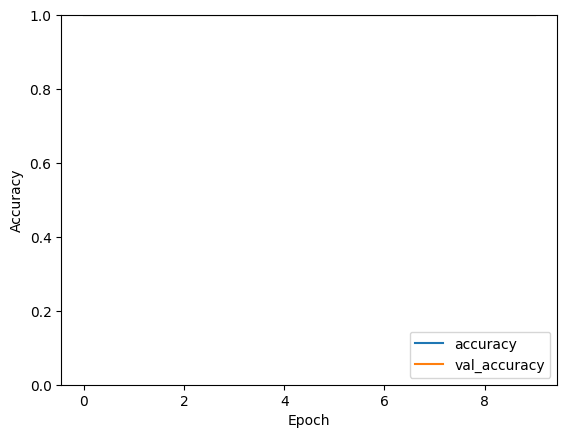

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [20]:
model.save('modelo_classificacao_plantas.h5')